In [0]:
import os
import urllib


def download_dependencies():
  """
  Baixa os arquivos:
   	+ utils.py
    +	preprocessing.py
    + dengue_labels_train.csv
    + dengue_features_test.csv
    + dengue_features_train.csv
  """
  
  # Cria diretório data/
  if not os.path.exists("./data/"):
    os.makedirs("./data/")
    
  url_base = "https://raw.githubusercontent.com/Jose-Paulo-FaD/DengAI/master/"
    
  filename = [
      "utils.py",
      "preprocessing.py",
      "data/dengue_labels_train.csv",
      "data/dengue_features_test.csv",
      "data/dengue_features_train.csv"
  ]
    
  for f in filename:
    if not os.path.exists(f):
      urllib.request.urlretrieve(url_base + f, f)  

    
download_dependencies()

In [0]:
import utils
import numpy as np
import pandas as pd
import preprocessing
from matplotlib import pyplot as plt
from sklearn import ensemble, tree, linear_model, metrics

# Testando regressores:

Nesta seção, o conjunto de treinamento foi dividir em 75% para treinamento e 25% para validação. Isso foi feito para avaliarmos o modelo em vista do fato de não termos os rótulos da base de teste.

* Optou-se por desenvolver regressores diferentes para cada cidade.

In [0]:
training_features_path = './data/dengue_features_train.csv'
training_labels_path = './data/dengue_labels_train.csv'

# Import data
feature_frame = pd.read_csv(training_features_path)
labels_frame = pd.read_csv(training_labels_path)

# Drop redundant columns
labels_frame.drop(['city', 'year', 'weekofyear'], axis = 1, inplace = True)

# Join features and labels
all_frame = feature_frame.join(labels_frame).drop(['week_start_date'], axis = 1)

# Separate San Juan and Iquitos
sj_frame = all_frame.loc[all_frame['city'] == 'sj'].reset_index(drop = True)
iq_frame = all_frame.loc[all_frame['city'] == 'iq'].reset_index(drop = True)

In [0]:
# # Plot correlation matrix, sorted by total cases correlation
# plt.figure(figsize = (8, 8))
# utils.corrplot(all_frame.corr().sort_values('total_cases', axis = 1), size_scale = 150)

In [0]:
# San Juan
ratio = 0.75
n = sj_frame.shape[0]

y_train_sj = sj_frame.iloc[:int(ratio*n), -1].to_frame()
X_train_sj = sj_frame.iloc[:int(ratio*n), 1:-1]

y_test_sj = sj_frame.iloc[int(ratio*n):, -1].to_frame()
X_test_sj = sj_frame.iloc[int(ratio*n):, 1:-1]

method = 'median'
normalize = False

y_train_sj_p, _ = preprocessing.preprocess(y_train_sj, y_train_sj, 
                                           method = method, normalize = normalize)
X_train_sj_p, _ = preprocessing.preprocess(X_train_sj, X_train_sj, 
                                           method = method, normalize = normalize)

y_test_sj_p, _ = preprocessing.preprocess(y_test_sj, y_train_sj, 
                                          method = method, normalize = normalize)
X_test_sj_p, _ = preprocessing.preprocess(X_test_sj, X_train_sj, 
                                          method = method, normalize = normalize)

In [0]:
# Iquitos
ratio = 0.75
n = iq_frame.shape[0]

y_train_iq = iq_frame.iloc[:int(ratio*n), -1].to_frame()
X_train_iq = iq_frame.iloc[:int(ratio*n), 1:-1]

y_test_iq = iq_frame.iloc[int(ratio*n):, -1].to_frame()
X_test_iq = iq_frame.iloc[int(ratio*n):, 1:-1]

method = 'median'
normalize = False

y_train_iq_p, _ = preprocessing.preprocess(y_train_iq, y_train_iq, 
                                           method = method, normalize = normalize)
X_train_iq_p, _ = preprocessing.preprocess(X_train_iq, X_train_iq, 
                                           method = method, normalize = normalize)

y_test_iq_p, _ = preprocessing.preprocess(y_test_iq, y_train_iq, 
                                          method = method, normalize = normalize)
X_test_iq_p, _ = preprocessing.preprocess(X_test_iq, X_train_iq, 
                                          method = method, normalize = normalize)

## Floresta Aleatória

In [7]:
# Init model to San Juan and Iquitos
rf_model_sj = ensemble.RandomForestRegressor(n_estimators = 50)
rf_model_iq = ensemble.RandomForestRegressor(n_estimators = 50)

# Train model
rf_model_sj.fit(X_train_sj_p, y_train_sj_p)
rf_model_iq.fit(X_train_iq_p, y_train_iq_p)

# Predict data on training and test set
y_train_sj_hat = rf_model_sj.predict(X_train_sj_p)
y_test_sj_hat = rf_model_sj.predict(X_test_sj_p)
y_train_iq_hat = rf_model_iq.predict(X_train_iq_p)
y_test_iq_hat = rf_model_iq.predict(X_test_iq_p)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


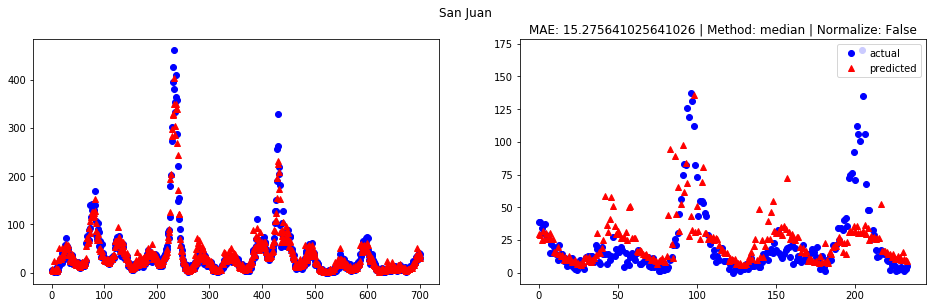

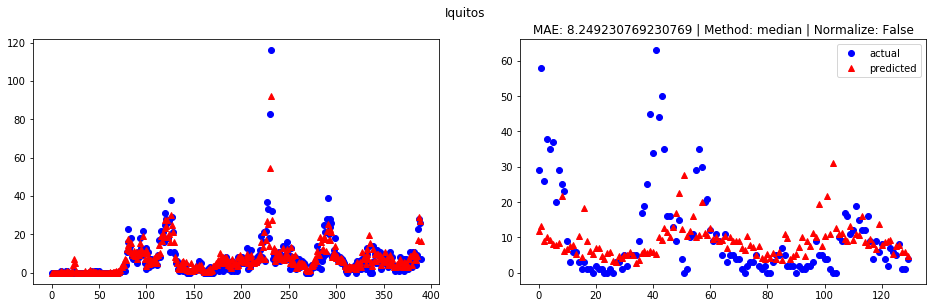

In [8]:
# Plot results
plt.figure(figsize=(16,9/2))

plt.subplot(121)
plt.plot(np.array(y_train_sj_p), 'ob', label = 'actual')
plt.plot(np.array(y_train_sj_hat), '^r', label = 'predicted')

plt.subplot(122)
plt.plot(np.array(y_test_sj_p), 'ob', label = 'actual')
plt.plot(y_test_sj_hat, '^r', label = 'predicted')

plt.title('MAE: {} | Method: {} | Normalize: {}'.format(
    str(metrics.mean_absolute_error(y_test_sj_p, y_test_sj_hat)), 
    str(method), str(normalize)))
plt.legend(loc='upper right')
plt.suptitle("San Juan")
plt.show()

# Plot results
plt.figure(figsize=(16,9/2))

plt.subplot(121)
plt.plot(np.array(y_train_iq_p), 'ob', label = 'actual')
plt.plot(np.array(y_train_iq_hat), '^r', label = 'predicted')

plt.subplot(122)
plt.plot(np.array(y_test_iq_p), 'ob', label = 'actual')
plt.plot(y_test_iq_hat, '^r', label = 'predicted')

plt.title('MAE: {} | Method: {} | Normalize: {}'.format(
    str(metrics.mean_absolute_error(y_test_iq_p, y_test_iq_hat)), 
    str(method), str(normalize)))
plt.legend(loc='upper right')
plt.suptitle("Iquitos")
plt.show()

## Árvore de Decisão

In [0]:
# Init model to San Juan and Iquitos
dt_model_sj = tree.DecisionTreeRegressor(criterion = 'mae', 
                                         max_depth = 8, 
                                         random_state = 0)
dt_model_iq = tree.DecisionTreeRegressor(criterion = 'mae', 
                                         max_depth = 8, 
                                         random_state = 0)

# Train model
dt_model_sj.fit(X_train_sj_p, y_train_sj_p)
dt_model_iq.fit(X_train_iq_p, y_train_iq_p)

# Predict data on training and test set
y_train_sj_hat = dt_model_sj.predict(X_train_sj_p)
y_test_sj_hat = dt_model_sj.predict(X_test_sj_p)
y_train_iq_hat = dt_model_iq.predict(X_train_iq_p)
y_test_iq_hat = dt_model_iq.predict(X_test_iq_p)

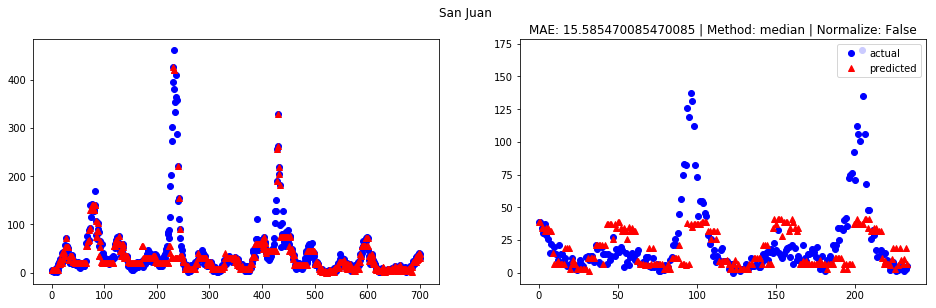

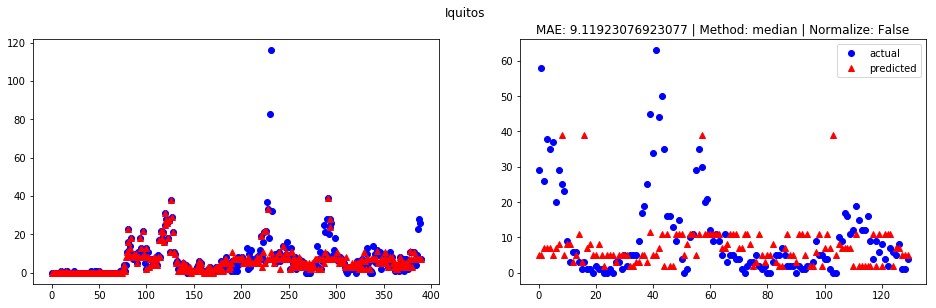

In [10]:
# Plot results
plt.figure(figsize=(16,9/2))

plt.subplot(121)
plt.plot(np.array(y_train_sj_p), 'ob', label = 'actual')
plt.plot(np.array(y_train_sj_hat), '^r', label = 'predicted')

plt.subplot(122)
plt.plot(np.array(y_test_sj_p), 'ob', label = 'actual')
plt.plot(y_test_sj_hat, '^r', label = 'predicted')

plt.title('MAE: {} | Method: {} | Normalize: {}'.format(
    str(metrics.mean_absolute_error(y_test_sj_p, y_test_sj_hat)), 
    str(method), str(normalize)))
plt.legend(loc='upper right')
plt.suptitle("San Juan")
plt.show()

# Plot results
plt.figure(figsize=(16,9/2))

plt.subplot(121)
plt.plot(np.array(y_train_iq_p), 'ob', label = 'actual')
plt.plot(np.array(y_train_iq_hat), '^r', label = 'predicted')

plt.subplot(122)
plt.plot(np.array(y_test_iq_p), 'ob', label = 'actual')
plt.plot(y_test_iq_hat, '^r', label = 'predicted')

plt.title('MAE: {} | Method: {} | Normalize: {}'.format(
    str(metrics.mean_absolute_error(y_test_iq_p, y_test_iq_hat)), 
    str(method), str(normalize)))
plt.legend(loc='upper right')
plt.suptitle("Iquitos")
plt.show()

## Regressão Linear

In [0]:
# Init model to San Juan and Iquitos
lr_model_sj = linear_model.LinearRegression()
lr_model_iq = linear_model.LinearRegression()

# Train model
lr_model_sj.fit(X_train_sj_p, y_train_sj_p)
lr_model_iq.fit(X_train_iq_p, y_train_iq_p)

# Predict data on training and test set
y_train_sj_hat = lr_model_sj.predict(X_train_sj_p)
y_test_sj_hat = lr_model_sj.predict(X_test_sj_p)
y_train_iq_hat = lr_model_iq.predict(X_train_iq_p)
y_test_iq_hat = lr_model_iq.predict(X_test_iq_p)

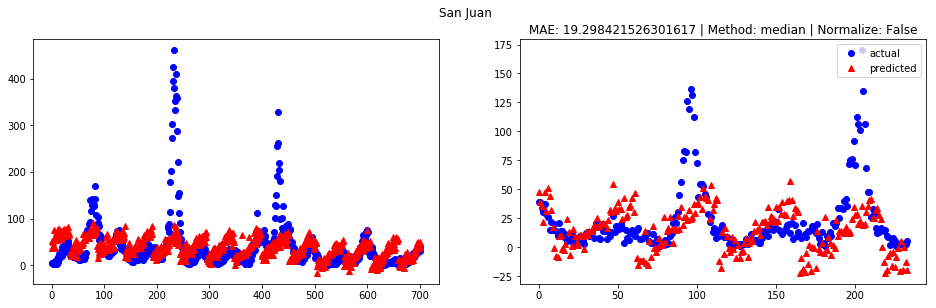

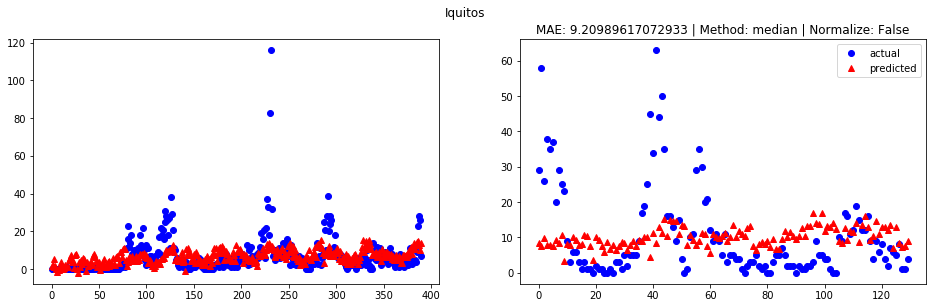

In [12]:
# Plot results
plt.figure(figsize=(16,9/2))

plt.subplot(121)
plt.plot(np.array(y_train_sj_p), 'ob', label = 'actual')
plt.plot(np.array(y_train_sj_hat), '^r', label = 'predicted')

plt.subplot(122)
plt.plot(np.array(y_test_sj_p), 'ob', label = 'actual')
plt.plot(y_test_sj_hat, '^r', label = 'predicted')

plt.title('MAE: {} | Method: {} | Normalize: {}'.format(
    str(metrics.mean_absolute_error(y_test_sj_p, y_test_sj_hat)), 
    str(method), str(normalize)))
plt.legend(loc='upper right')
plt.suptitle("San Juan")
plt.show()

# Plot results
plt.figure(figsize=(16,9/2))

plt.subplot(121)
plt.plot(np.array(y_train_iq_p), 'ob', label = 'actual')
plt.plot(np.array(y_train_iq_hat), '^r', label = 'predicted')

plt.subplot(122)
plt.plot(np.array(y_test_iq_p), 'ob', label = 'actual')
plt.plot(y_test_iq_hat, '^r', label = 'predicted')

plt.title('MAE: {} | Method: {} | Normalize: {}'.format(
    str(metrics.mean_absolute_error(y_test_iq_p, y_test_iq_hat)), 
    str(method), str(normalize)))
plt.legend(loc='upper right')
plt.suptitle("Iquitos")
plt.show()

# Treinando um modelo

Com base nos testes acima, um **Regressor de Floresta Aleatória** será treinado com todo o conjunto de treinamento com a finalidade de predizer a quantidade de incidentes de dengue no conjunto de testes.

In [0]:
test_features_path = './data/dengue_features_test.csv'
training_labels_path = './data/dengue_labels_train.csv'
training_features_path = './data/dengue_features_train.csv'

# Import data
test_frame = pd.read_csv(test_features_path)
labels_frame = pd.read_csv(training_labels_path)
feature_frame = pd.read_csv(training_features_path)

# Drop redundant columns
labels_frame.drop(['city', 'year', 'weekofyear'], axis = 1, inplace = True)

# Join features and labels
all_frame = feature_frame.join(labels_frame).drop(['week_start_date'], axis = 1)

# Separate San Juan and Iquitos
sj_frame = all_frame.loc[all_frame['city'] == 'sj'].reset_index(drop = True)
iq_frame = all_frame.loc[all_frame['city'] == 'iq'].reset_index(drop = True)
sj_frame_real = test_frame.loc[test_frame['city'] == 'sj'].reset_index(drop = True)
iq_frame_real = test_frame.loc[test_frame['city'] == 'iq'].reset_index(drop = True)

In [0]:
# San Juan
train_frame_sj = sj_frame
test_frame_sj = sj_frame_real

test_frame_sj.drop(['week_start_date'], axis = 1, inplace = True)

n = train_frame_sj.shape[0]
y_train_sj = train_frame_sj.iloc[:, -1].to_frame()
X_train_sj = train_frame_sj.iloc[:, 1:-1]
X_real_sj = test_frame_sj.iloc[:, 1:]

method = 'median'
normalize = False

y_train_sj_p, _ = preprocessing.preprocess(y_train_sj, y_train_sj, method = method, normalize = normalize)
X_train_sj_p, _ = preprocessing.preprocess(X_train_sj, X_train_sj, method = method, normalize = normalize)
X_real_sj_p, _ = preprocessing.preprocess(X_real_sj, X_real_sj, method = method, normalize = normalize)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


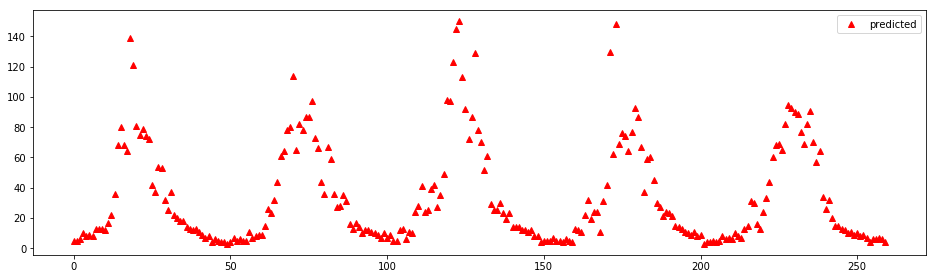

In [15]:
# Init model
model_sj = ensemble.RandomForestRegressor(n_estimators = 50)
# Train model
model_sj.fit(X_train_sj_p, y_train_sj_p)

# Predict outcome
y_real_sj_hat = model_sj.predict(X_real_sj_p)
# Limit minimum value as 0
y_real_sj_hat[y_real_sj_hat < 0] = 0
y_real_sj_hat = y_real_sj_hat.astype("int")

# Plot predictions
plt.figure(figsize=(16,9/2))
plt.plot(y_real_sj_hat, '^r', label = 'predicted')
plt.legend(loc='upper right')
plt.show()

In [0]:
# Iquitos
train_frame_iq = iq_frame
test_frame_iq = iq_frame_real

test_frame_iq.drop(['week_start_date'], axis = 1, inplace = True)

n = train_frame_iq.shape[0]
y_train_iq = train_frame_iq.iloc[:, -1].to_frame()
X_train_iq = train_frame_iq.iloc[:, 1:-1]
X_real_iq = test_frame_iq.iloc[:, 1:]

method = 'median'
normalize = False

y_train_iq_p, _ = preprocessing.preprocess(y_train_iq, y_train_iq, method = method, normalize = normalize)
X_train_iq_p, _ = preprocessing.preprocess(X_train_iq, X_train_iq, method = method, normalize = normalize)
X_real_iq_p, _ = preprocessing.preprocess(X_real_iq, X_real_iq, method = method, normalize = normalize)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


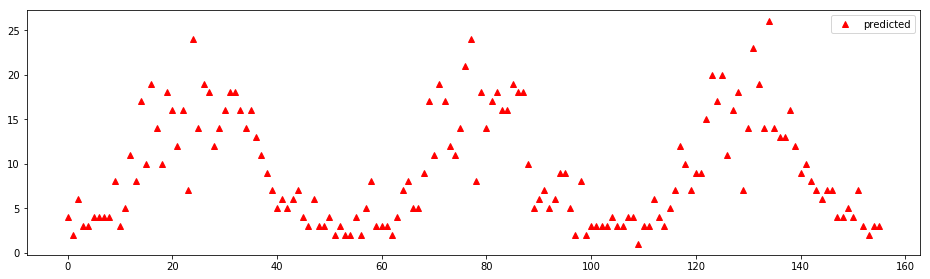

In [17]:
# Init model
model_iq = ensemble.RandomForestRegressor(n_estimators = 50)
# Train model
model_iq.fit(X_train_iq_p, y_train_iq_p)

# Predict outcome
y_real_iq_hat = model_iq.predict(X_real_iq_p)
# Limit minimum value as 0
y_real_iq_hat[y_real_iq_hat < 0] = 0
y_real_iq_hat = y_real_iq_hat.astype("int")

# Plot predictions
plt.figure(figsize=(16,9/2))
plt.plot(y_real_iq_hat, '^r', label = 'predicted')
plt.legend(loc='upper right')
plt.show()

In [0]:
# Concatenate predictions
predictions = np.concatenate([y_real_sj_hat, y_real_iq_hat])

df = pd.read_csv("https://raw.githubusercontent.com/Jose-Paulo-FaD/DengAI/master/data/submission_format.csv")
df["total_cases" ]= predictions

df.to_csv("submission_format.csv", index=False)